# Predicting Remaining Usable Life of a PC7000 Excavator

This notebook demonstrates a machine learning experiment to predict the remaining usable life of a PC7000 excavator using a synthetic dataset. We will generate data, visualize it, preprocess, train a regression model, evaluate its performance, and make predictions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

n_samples = 1000
operating_hours = np.random.uniform(1000, 20000, n_samples)
load = np.random.uniform(0.5, 1.5, n_samples)  # normalized load factor
avg_temp = np.random.uniform(20, 80, n_samples)  # degrees Celsius
vibration = np.random.uniform(0.1, 2.0, n_samples)  # vibration level
maintenance_count = np.random.randint(0, 10, n_samples)

# Synthetic formula for remaining life (in hours)
remaining_life = (
    25000 - operating_hours - (load * 1000) - (avg_temp * 50) - (vibration * 500) - (maintenance_count * 200)
    + np.random.normal(0, 1000, n_samples)
)
remaining_life = np.clip(remaining_life, 0, None)

data = pd.DataFrame({
    'OperatingHours': operating_hours,
    'Load': load,
    'AvgTemp': avg_temp,
    'Vibration': vibration,
    'MaintenanceCount': maintenance_count,
    'RemainingLife': remaining_life
})
data.head()

,OperatingHours,Load,AvgTemp,Vibration,MaintenanceCount,RemainingLife
0,8116.262258,0.685133,35.702341,1.378136,9,12409.421209
1,19063.571822,1.041901,34.818728,1.613695,4,1078.921323
2,14907.884894,1.372946,74.375275,0.575889,4,3107.736452
3,12374.511200,1.232225,34.972772,1.287261,6,7886.073952
4,3964.354168,1.306561,36.316984,1.186317,3,16517.159358


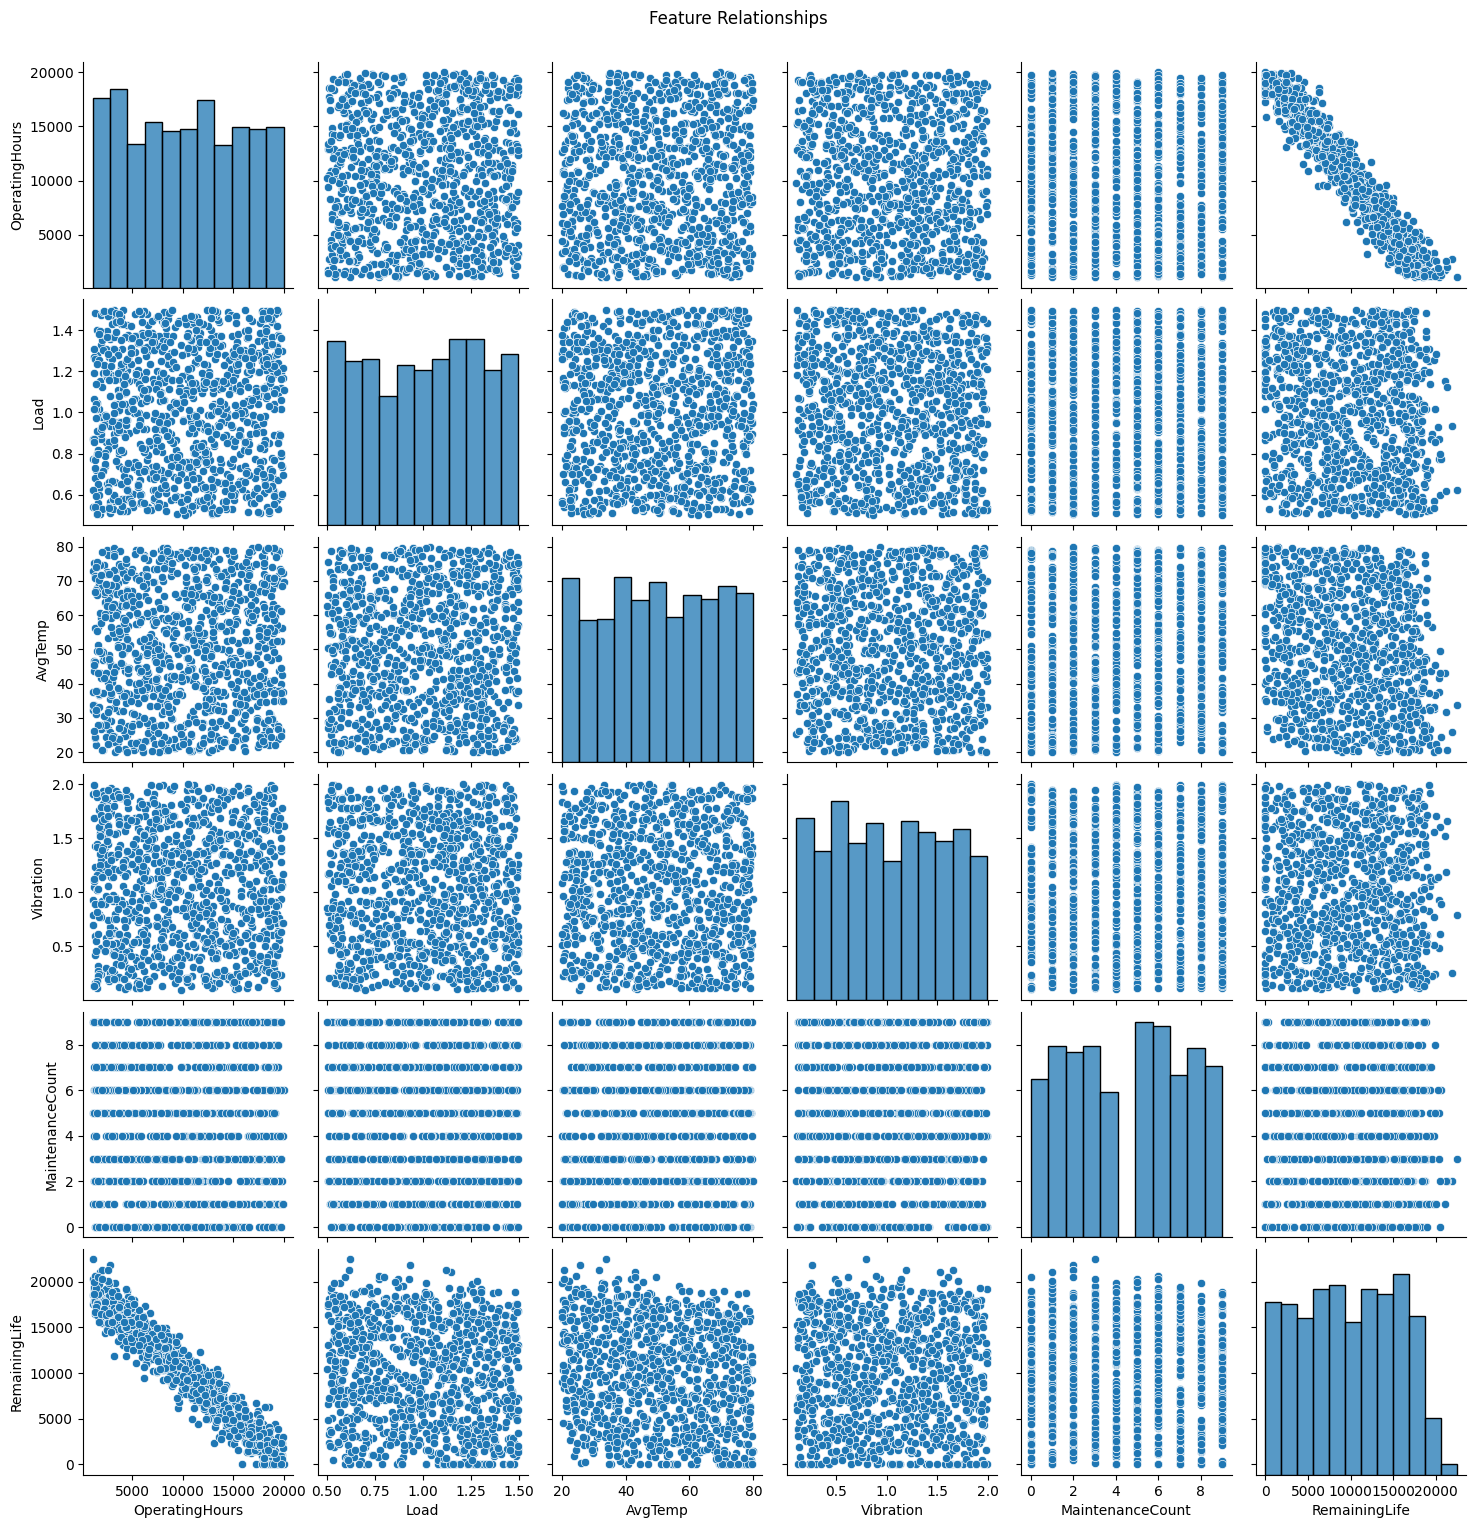

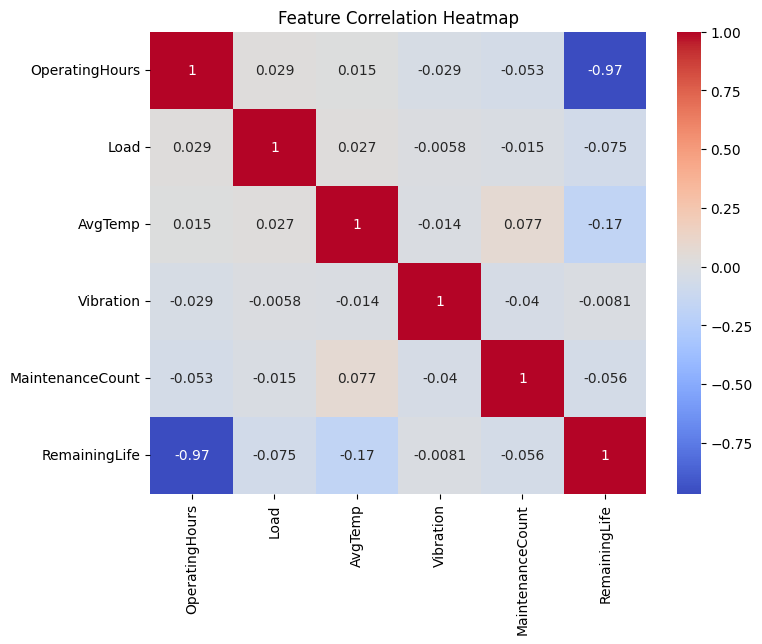

In [4]:
# Pairplot to visualize relationships
sns.pairplot(data, vars=['OperatingHours', 'Load', 'AvgTemp', 'Vibration', 'MaintenanceCount', 'RemainingLife'])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [5]:
# Check for missing values
print('Missing values per column:')
print(data.isnull().sum())

# Feature scaling
features = ['OperatingHours', 'Load', 'AvgTemp', 'Vibration', 'MaintenanceCount']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

Missing values per column:
OperatingHours      0
Load                0
AvgTemp             0
Vibration           0
MaintenanceCount    0
RemainingLife       0
dtype: int64


In [6]:
X = data[features]
y = data['RemainingLife']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

Training samples: 800, Testing samples: 200


In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print('Model training complete.')

Model training complete.


Mean Absolute Error: 854.91
R-squared: 0.96


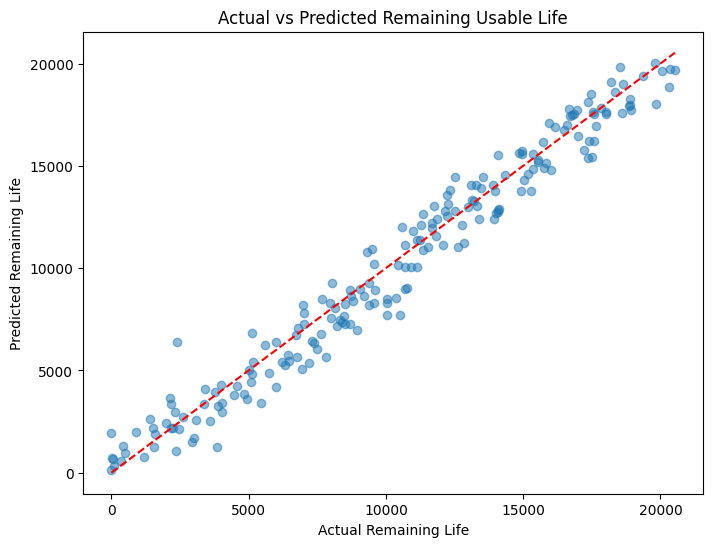

In [8]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Remaining Life')
plt.ylabel('Predicted Remaining Life')
plt.title('Actual vs Predicted Remaining Usable Life')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

In [9]:
# Example: Predict remaining life for new excavator data
new_data = pd.DataFrame({
    'OperatingHours': [5000, 15000],
    'Load': [1.0, 1.2],
    'AvgTemp': [40, 70],
    'Vibration': [0.5, 1.5],
    'MaintenanceCount': [2, 7]
})
new_data[features] = scaler.transform(new_data[features])
predictions = model.predict(new_data[features])

for i, pred in enumerate(predictions):
    print(f'Example {i+1}: Predicted Remaining Usable Life = {pred:.2f} hours')

Example 1: Predicted Remaining Usable Life = 15929.32 hours
Example 2: Predicted Remaining Usable Life = 3287.71 hours
